In [1]:
import yt, json, glob
import numpy as np
import matplotlib.pyplot as plt
from analysis_helpers import *



C:\Users\azton\Anaconda3\lib\site-packages\yt\utilities\logger.py:4: VisibleDeprecationWarning: The configuration file C:\Users\azton\.config\yt\ytrc is deprecated in favor of C:\Users\azton\.config\yt\yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


In [2]:
sim = '*'
logs = glob.glob('C:/Users/azton/Projects/phoenix_analysis/size_of-single/%s/*.json'%sim)
with open(logs[0], 'r') as f:
    rq = json.load(f)
for i, log in enumerate(logs):
    if i != 0:
        with open(log, 'r') as f:
            newd = json.load(f)
        for k in newd:
            rq[k] = newd[k]
tlen = 0
tmax = 0
n = 0
for k in rq:
    if len(rq[k]['time']) > tlen: tlen = len(rq[k]['time'])
    dt = max(rq[k]['time']) - min(rq[k]['time'])
    if dt > tmax: tmax = dt
    n+= 1
print('%d Samples; Time Length: %d, Model_Time = %0.1f'%(n,tlen, tmax))
for k in rq:
    for kk in rq[k]:
        print(kk)
    break
uni_pids = []
for k in rq:
    if k not in uni_pids:
        uni_pids.append(k)
print('%d Unique PIDS as keys '%len(uni_pids))
dt = tmax / tlen

2225 Samples; Time Length: 50, Model_Time = 50.0
region_start_time
box_size
region_center
region_unitary
time
redshift
p3_metallicity_radius
H_p1_fraction_radius
sum_metallicity_radius
p3_all_ctime
p3_all_position
p3_star_position
p3_all_mass
p3_all_idx
snr_ctime
p3_bh_ctime
p3_live_masses
p3_live_ctime
p2_star_masses
p2_star_ctime
p2_star_position
p3_bh_mass
snr_mass
enriched_stat
2225 Unique PIDS as keys 


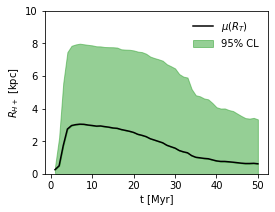

In [3]:
ltime = tlen # number of time slots expected
# tmax += 1 # account for not including last time in np.arange
nskip = tmax // (ltime-1)
time = np.arange(0, tmax, nskip)
# print('time size: ', time.size, time)
temp_profs = []
for k in rq:
    if 'region_center' in rq[k].keys():
        tk = rq[k]['H_p1_fraction_radius']
        while len(tk) < ltime:
            tk.append(0)
        temp_profs.append(tk)

temp_profs = np.array(temp_profs)
meant = []
stdt = []
for p in range(ltime):
    bin = temp_profs[:,p]
    meant.append(bin[bin > 0].mean())
    stdt.append(bin[bin > 0].std())
meant = np.array(meant)
stdt = np.array(stdt)
fig, ax = plt.subplots(figsize=(4,3))
n=0
for prof in temp_profs: #iterate particle indices that were logged
#     ax.plot(time[1:][prof >0], prof[prof > 0], alpha=0.02, color='tab:blue', label = "$R_T$" if n == 0 else None)
    n += 1

    #     ax.set_yscale('log')
    # ax.set_ylim(0.0, max(rq[k]['p3_metallicity_radius']))
ax.plot(time[1:], meant, alpha=1, color='k', label='$\mu (R_T)$')
ax.fill_between(time[1:], meant, meant+1.97*stdt, color='tab:green',alpha=0.5, label= '95% CL')
ax.fill_between(time[1:], meant, meant-1.97*stdt, color='tab:green',alpha=0.5)
ax.set_ylim(0,10)
# ax.set_title('Temperature Radius')
ax.set_ylabel('$R_{H+}$ [kpc]')
ax.set_xlabel('t [Myr]')
leg = ax.legend(frameon=False)
for l in leg.get_lines():
    l.set_alpha(1)
plt.savefig('images/phx_h_p1_rad.pdf', bbox_inches='tight')

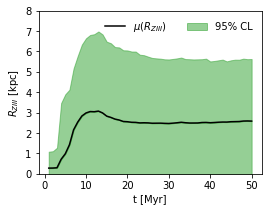

In [4]:
time = np.arange(0, tmax, nskip)
temp_profs = []
for k in rq:
    if 'region_center' in rq[k].keys():
        tk = rq[k]['p3_metallicity_radius']
        while len(tk) < ltime:
            tk.append(0)
        temp_profs.append(tk)

temp_profs = np.array(temp_profs)
meant = []
stdt = []
for p in range(ltime):
    bin = temp_profs[:,p]
    meant.append(bin[bin > 0].mean())
    stdt.append(bin[bin > 0].std())
meant = np.array(meant)
stdt = np.array(stdt)
fig, ax = plt.subplots(figsize=(4,3))
n = 0
for prof in temp_profs: #iterate particle indices that were logged
#     ax.plot(time[1:][prof >0], prof[prof > 0], alpha=0.05, color='tab:blue', label='$R_{ZIII}$' if n == 0 else None)
    n+=1 
    # ax.set_yscale('log')
ax.plot(time[1:], meant, alpha=1, color='k', label='$\mu (R_{ZIII}$)')
ax.fill_between(time[1:], meant, meant+1.97*stdt, color='tab:green',alpha=0.5, label='95% CL')
ax.fill_between(time[1:], meant, meant-1.97*stdt, color='tab:green',alpha=0.5)
# ax.set_title('Population 3 Metal Radius')
ax.set_xlabel('t [Myr]')
ax.set_ylabel('$R_{ZIII}$ [kpc]')
ax.set_ylim(0,8)
leg = ax.legend(frameon=False, ncol=2)
for l in leg.get_lines():
    l.set_alpha(1)
# ax.set_ylim(1, 125)
plt.savefig('images/phx_p3z_radius.pdf', bbox_inches='tight')

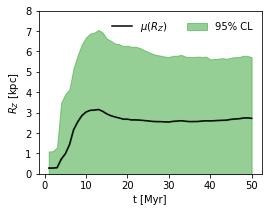

In [5]:
time = np.arange(0, tmax, nskip)
temp_profs = []
for k in rq:
    if 'region_center' in rq[k].keys():
        tk = rq[k]['sum_metallicity_radius']
        while len(tk) < ltime:
            tk.append(0)
        temp_profs.append(tk)

temp_profs = np.array(temp_profs)
meant = []
stdt = []
for p in range(ltime):
    bin = temp_profs[:,p]
    meant.append(bin[bin > 0].mean())
    stdt.append(bin[bin > 0].std())
meant = np.array(meant)
stdt = np.array(stdt)
fig, ax = plt.subplots(figsize=(4,3))
n = 0
for prof in temp_profs: #iterate particle indices that were logged
#     ax.plot(time[1:][prof >0], prof[prof > 0], alpha=0.05, color='tab:blue', label='$R_{ZIII}$' if n == 0 else None)
    n+=1 
    # ax.set_yscale('log')
ax.plot(time[1:], meant, alpha=1, color='k', label='$\mu (R_{Z}$)')
ax.fill_between(time[1:], meant, meant+1.97*stdt, color='tab:green',alpha=0.5, label='95% CL')
ax.fill_between(time[1:], meant, meant-1.97*stdt, color='tab:green',alpha=0.5)
# ax.set_title('Population 3 Metal Radius')
ax.set_xlabel('t [Myr]')
ax.set_ylabel('$R_{Z}$ [kpc]')
ax.set_ylim(0,8)
leg = ax.legend(frameon=False, ncol=2)
for l in leg.get_lines():
    l.set_alpha(1)
# ax.set_ylim(1, 125)
plt.savefig('images/phx_z_radius.pdf', bbox_inches='tight')

-1.0 -0.3091953095243168


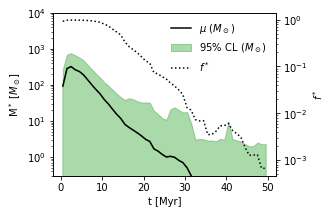

In [6]:
timebins = np.arange(0, tmax+1, dt)
allmass = []
fig, ax = plt.subplots(figsize=(4,3))
nmasses = []
for k in rq:# iterate p3 forming regions
    if 'region_center' in rq[k].keys():
        massbins = [-1 for t in range(tlen)]
        for kk in ['p3_live_masses']:

            for i, t in enumerate(rq[k][kk]):
                try:
                    p3pos = np.array(rq[k]['p3_star_position'][i])    
                    bc = np.array(rq[k]['region_center'][i])
                except:
                    continue
                p3dist = np.array([np.linalg.norm(p3 - bc) for p3 in p3pos])
    #             print(p3dist)

                if 'snr_mass' in kk:
                    t = [m*1e20 for m in t]
                if 'p3_live_masses' in kk:
                    t = [m if (m > 11 and m < 40) or (m > 140 and m < 260) else 0 for m in t]
    #             print(t)
                massbins[i] = np.array(t)[p3dist < 50].sum() if len(t) > 0 else 0

                #     ax.plot(time[1:], massbins, color='tab:blue',alpha=0.1)
        allmass.append(massbins)
time = np.array([(timebins[i] + timebins[i-1])/2.0 for i in range(1, len(timebins))])
allmass = np.array(allmass)
meanall = np.zeros(tlen)
stdall = np.zeros(tlen)
fwstar = np.zeros(tlen)
for i,t in enumerate(time):
    fwstar[i] += sum(allmass[:,i] >= 1)/sum(allmass[:,i] >= 0)
    meanall[i] += allmass[:,i][allmass[:,i] >= 0].mean()
    stdall[i] += allmass[:,i][allmass[:,i] >= 0].std()

ln = ax.plot(time, meanall, color='k', alpha=1, label='$\mu~(M_\odot)$')
fll = ax.fill_between(time, meanall, meanall+1.97*stdall, color='tab:green', alpha=0.4, label='95% CL ($M_\odot$)')
ax.fill_between(time, meanall, meanall-1.97*stdall, color='tab:green', alpha=0.4)
# ax.set_ylim(1,2500)
ax.set_yscale('log')
ax2 = ax.twinx()
print(allmass[:,-1].min(), allmass[:,-1].mean())

ln2 = ax2.plot(time, fwstar, color='k', linestyle=':', label='$f^*$')
# ax2.set_yticks([0,1e-5,0.1,0.3,0.7, 1])

lines, labels = ax.get_legend_handles_labels()
l2, lab2 = ax2.get_legend_handles_labels()
ax.legend(lines+l2, labels+lab2, frameon=False)
ax.set_ylim(0.3, 10**4)
# ax2.set_yticks([0.1,0.3,0.5,0.7,0.9])
ax2.set_yscale('log')
ax.set_ylabel('M$^*$ [$M_\odot$]')
ax2.set_ylabel("$f^*$")
ax.set_xlabel('t [Myr]')
plt.savefig("images/p3_masses_region_fracs.pdf", bbox_inches='tight')


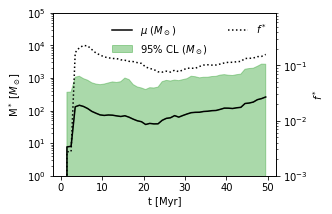

In [28]:
timebins = np.arange(0, tmax+1, dt)
allmass = []
fig, ax = plt.subplots(figsize=(4,3))
nmasses = []
for k in rq:# iterate p3 forming regions
    if 'region_center' in rq[k].keys():

        massbins = [-1 for t in range(tlen)]
        for kk in ['p2_star_masses']:
            for i, t in enumerate(rq[k][kk]):
                try:
                    p2pos = np.array(rq[k]['p2_star_position'][i])    
                    bc = np.array(rq[k]['region_center'][i])
                except:
                    continue
                p2dist = np.array([np.linalg.norm(p2 - bc) for p2 in p2pos])
                
                massbins[i] =  np.array(t)[p2dist < 50].sum() if len(t) > 0 else 0
        allmass.append(massbins)
# for mass in allmass:
#     print(mass)
meanall = np.array(allmass).mean(0)
stdall = np.array(allmass).std(0)
time = np.array([(timebins[i] + timebins[i-1])/2.0 for i in range(1, len(timebins))])
ln = ax.plot(time, np.array(allmass).mean(0), color='k', alpha=1, label='$\mu~(M_\odot)$')
fll = ax.fill_between(time, meanall, meanall+1.97*stdall, color='tab:green', alpha=0.4, label='95% CL ($M_\odot$)')
ax.fill_between(time, meanall, meanall-1.97*stdall, color='tab:green', alpha=0.4)
# ax.set_ylim(1,2500)
ax.set_yscale('log')
ax2 = ax.twinx()
allmass = np.array(allmass)

fwstar = np.zeros(tlen)
for i,t in enumerate(time):
    fwstar[i] += sum(allmass[:,i] > 0) / float(sum(allmass[:,i]!=-1))

ln2 = ax2.plot(time, fwstar, color='k', linestyle=':', label='$f^*$')
# ax2.set_yticks([0,1e-5,0.1,0.3,0.7, 1])

lines, labels = ax.get_legend_handles_labels()
l2, lab2 = ax2.get_legend_handles_labels()
ax.legend(lines+l2, labels+lab2, frameon=False, ncol=2)
ax.set_ylim(1,10**5)
ax2.set_yscale('log')
ax2.set_ylim(1e-3, 0.9)
ax.set_ylabel('M$^*$ [$M_\odot$]')
ax2.set_ylabel("$f^*$")
ax.set_xlabel('t [Myr]')
plt.savefig("images/p3_masses_region_fracs.pdf", bbox_inches='tight')

2.5802247191011234 5.844037771745765 1.0


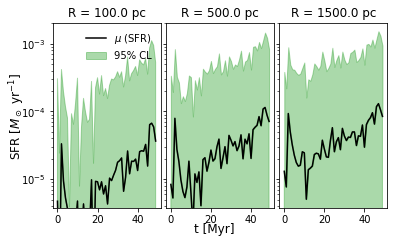

In [13]:
fig, axx = plt.subplots(1,3, figsize=(6,3.4), sharex=True, sharey=True)
timebins = np.arange(0, tmax+1, dt)
for jj, r in enumerate([100, 500, 1500]):
    sfrs = []
    n_all = []
    for j, k in enumerate(rq):
        try:
            p2pos = np.array(rq[k]['p2_star_position'][-1])    
            bc = np.array(rq[k]['region_center'][-1])
        except:
            continue
        p2dist = np.array([np.linalg.norm(p2 - bc) for p2 in p2pos])
        mass_time = np.zeros_like(timebins)
        all_mass = np.array(rq[k]['p2_star_masses'][-1])[p2dist < r]
        n_all.append(len(all_mass))
        all_ctime = np.array(rq[k]['p2_star_ctime'][-1])[p2dist < r]
        first_time = min(rq[k]['time'])
        last_time = max(rq[k]['time'])
        all_ctime = all_ctime - first_time
        dtotal = last_time - first_time
    #     all_mass[all_mass < 1e-5] *= 1e20

        if dtotal < 4: continue

        cbinned = np.digitize(all_ctime, timebins, right=False)
        for i, bin in enumerate(cbinned):
            if bin >= timebins.size:
                continue
            mass_time[bin] += all_mass[i]
        mt = np.cumsum(mass_time)
        dmdt = [(mt[i] - mt[i-1]) / (dt*1e6) for i in range(1, len(mt))]
        while len(dmdt) < tlen:
            dmdt.append(0)
        sfrs.append(dmdt)
    #     ax.plot(timebins[1:], dmdt, alpha=0.1, color='tab:blue')
    sfrs = np.array(sfrs)
    meansfrs = np.average(sfrs, axis=0)
    sfrstd = np.std(sfrs, axis=0)
    ax = axx[jj]
    ax.plot(timebins[:-1], meansfrs, alpha=1, color='k', label='$\mu$ (SFR)')
    ax.fill_between(timebins[:-1], meansfrs, meansfrs+1.97*sfrstd, color='tab:green',alpha=0.4, label='95% CL')
    ax.fill_between(timebins[:-1], meansfrs, meansfrs-1.97*sfrstd, color='tab:green',alpha=0.4)
    ax.set_yscale('log')
    ax.set_title('R = %0.1f pc'%r)

axx[0].legend(frameon=False)
plt.subplots_adjust(wspace=0.05)
fig.supylabel('SFR [$M_\odot$ yr$^{-1}$]')
fig.supxlabel('t [Myr]')
plt.savefig("images/p2_sfr_by_region.pdf", bbox_inches='tight')
print(np.average(n_all), np.std(n_all), np.median(n_all))

18.927191011235955 13.354664293860663 16.0


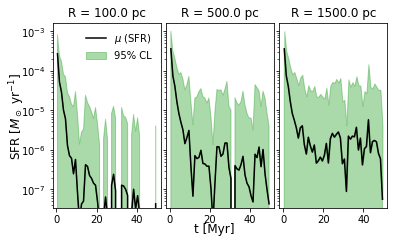

In [14]:
fig, axx = plt.subplots(1,3, figsize=(6,3.4), sharex=True, sharey=True)
timebins = np.arange(0, tmax+1, dt)
for jj, r in enumerate([100, 500, 1500]):
    sfrs = []
    if jj == 2:
        n_all = []
    for j, k in enumerate(rq):
        try:
            p3pos = np.array(rq[k]['p3_all_position'][-1])    
            bc = np.array(rq[k]['region_center'][-1])
        except:
            continue
        p3dist = np.array([np.linalg.norm(p3 - bc) for p3 in p3pos])
        mass_time = np.zeros_like(timebins)
        all_mass = np.array(rq[k]['p3_all_mass'][-1])[p3dist < r]
        if jj == 2:
            n_all.append(len(all_mass))
        all_ctime = np.array(rq[k]['p3_all_ctime'][-1])[p3dist < r]
        first_time = rq[k]['region_start_time']
        last_time = max(rq[k]['time'])
        all_ctime = all_ctime - first_time
        dtotal = last_time - first_time
        all_mass[all_mass < 1e-5] *= 1e20

        if dtotal < 4: continue

        cbinned = np.digitize(all_ctime, timebins, right=False)
        for i, bin in enumerate(cbinned):
            if bin >= timebins.size:
                continue
            mass_time[bin] += all_mass[i]
        mt = np.cumsum(mass_time)
        dmdt = [(mt[i] - mt[i-1]) / (dt*1e6) for i in range(1, len(mt))]
        while len(dmdt) < tlen:
            dmdt.append(0)
        sfrs.append(dmdt)
    #     ax.plot(timebins[1:], dmdt, alpha=0.1, color='tab:blue')
    sfrs = np.array(sfrs)

    meansfrs = np.average(sfrs, axis=0)
    sfrstd = np.std(sfrs, axis=0)
    ax = axx[jj]
    ax.set_title('R = %0.1f pc'%r)
    ax.plot(time, meansfrs, alpha=1, color='k', label='$\mu$ (SFR)')
    ax.fill_between(time, meansfrs, meansfrs+1.97*sfrstd, color='tab:green',alpha=0.4, label='95% CL')
    ax.fill_between(time, meansfrs, meansfrs-1.97*sfrstd, color='tab:green',alpha=0.4)
    ax.set_yscale('log')
axx[0].legend(frameon=False)
fig.supylabel('SFR [$M_\odot$ yr$^{-1}$]')
fig.supxlabel('t [Myr]')
plt.subplots_adjust(wspace=0.05)
plt.savefig("images/p3_sfr_by_region.pdf", bbox_inches='tight')
print(np.average(n_all), np.std(n_all), np.median(n_all))
# print(n_all)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59]
[ 0.16865381 -2.68359017  1.        ]
42113
[0.00504819 0.01468564 0.02661771 0.04726939 0.06837999 0.09407985
 0.14089032 0.18861863 0.23497017 0.27260211 0.32905002 0.36759982
 0.41808169 0.46030289 0.49839376 0.5571363  0.59339146 0.61909133
 0.65213401 0.68517669 0.71684259 0.74804956 0.7732905  0.80036714
 0.80403855 0.81321707 0.82882056 0.85819183 0.86369894 0.87287747
 0.8857274  0.89674162 0.906838   0.91188619 0.91968793 0.92335934
 0.92703075 0.93116108 0.93758605 0.94446994 0.95318954 0.95364846
 0.95594309 0.95869665 0.96879302 0.97292336 0.97659477 0.97751262
 0.98026618 0.9807251  0.98577329 0.9894447  0.99403396 0.99403396
 1.         1.         1.         1.        ]


C:\Users\azton\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


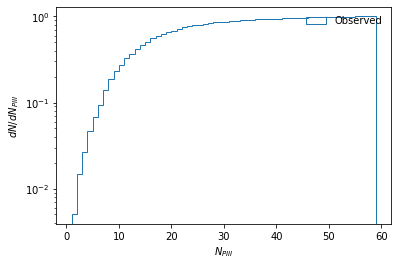

In [37]:
from scipy.optimize import curve_fit
def linreg(x, a,b,c):
    return np.exp((a*x + b))/ (1 + np.exp((a*x + b))) 
fig, ax = plt.subplots()
bins = np.arange(1,60)
print(bins)
hist, edges, _ = ax.hist(n_all, 
                         bins=bins, 
                         density=True, 
                         histtype='step', 
                         label='Observed', 
                         cumulative=True
                        )

popt, pcov = curve_fit(linreg, bins[:-1], hist)
print(popt)
pred_hist = linreg(bins, *popt)
# err = ((hist[hist!=0] - pred_hist[:-1][hist!=0])**2/pred_hist[:-1][hist!=0]).sum()
# ax.plot(bins, pred_hist, color='tab:orange', label="Fit: $\chi^2 = %0.2f$"%err)

# ax.set_xlim(1e-6,300)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('$dN/dN_{PIII}$')
ax.set_xlabel("$N_{PIII}$")
ax.legend(frameon=False)
print(sum(n_all))
print(hist)

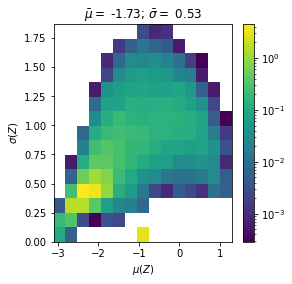

In [30]:
import scipy
from matplotlib.colors import LogNorm
def lognorm(x, mu, s):
    return 1./(s*x*np.sqrt(2*np.pi)) * np.exp(-1.*(np.log(x)-mu)**2/(2.*s**2))
mu_enr = []
std_enr = []
for k in rq.keys():
    mu_enr += rq[k]['enriched_stat']['mu']
    std_enr += rq[k]['enriched_stat']['std']
mu_enr = np.array(mu_enr)
std_enr = np.array(std_enr)
fig, ax = plt.subplots(figsize=(4,4))
# muhist,bins,_ = ax[0].hist(mu_enr[mu_enr != -1], bins=50, density=True, cumulative=True)
# stdhist,sbins,_ = ax[1].hist(std_enr[std_enr > 0], bins=50, density=True, cumulative=True)
im = ax.hist2d(mu_enr, std_enr, bins=15, norm=LogNorm(), density = True)
ax.set_title("$\\bar\\mu =$ %0.2f; $\\bar\\sigma =$ %0.2f"%(mu_enr.mean(), std_enr.mean()))
ax.set_ylabel('$\sigma(Z)$')
ax.set_xlabel("$\mu(Z)$")
fig.colorbar(im[3])
plt.subplots_adjust(wspace=0.01)

(array([[4.84174256e-04, 2.42087128e-03, 9.68348511e-03, 2.17878415e-02,
         5.61642136e-02, 1.42347231e-01, 2.46928870e-01, 4.21715777e-01,
         5.90692592e-01, 7.21419641e-01, 7.44660005e-01, 6.98663451e-01,
         5.07414620e-01, 3.36985282e-01, 1.80112823e-01, 9.39298056e-02,
         4.40598573e-02, 1.50094019e-02, 6.29426532e-03, 9.68348511e-04,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.62185441e-03,
         4.84271933e-02, 1.69957857e-01, 6.29604921e-01, 8.76470507e-01,
         7.44709471e-01, 4.63965413e-01, 2.70102413e-01, 1.83838262e-01,
         1.49497110e-01, 6.45747319e-01, 1.13099602e-01, 9.58776172e-02,
         9.26388559e-02, 8.82176896e-02, 7.62394136e-02, 6.43639554e-02,
         5.24370882e-02, 4.24123508e-02, 2.38537343e-02, 6.42611375e-03,
         1.23381384e-03]]),
 array([-3.85434294, -3.64780573, -3.44126852, -3.23473131, -3.0281941

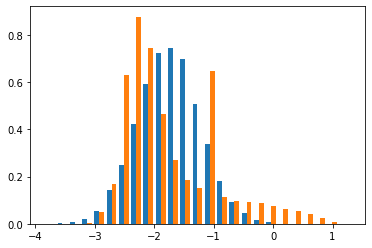

In [39]:
norms = np.random.normal(mu_enr.mean(), std_enr.mean(), size=10000)
plt.figure()
plt.hist([norms, mu_enr], bins=25, density=True)